# **Tasks**

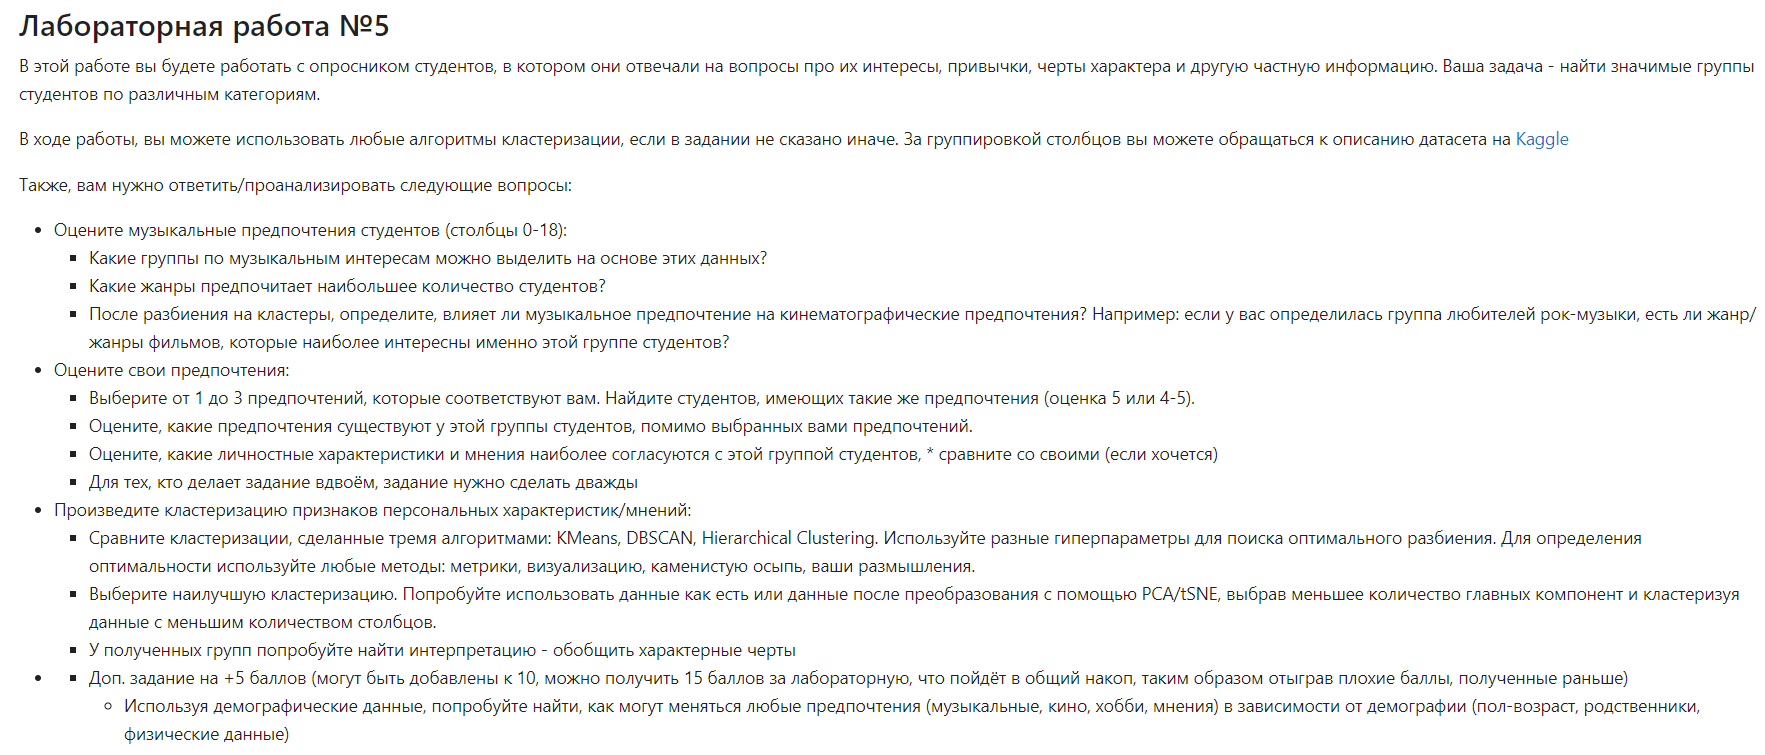

#Imports and installations

In [ ]:
import numpy as np
import seaborn as snus
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import sklearn.cluster as cluster
import sklearn.metrics as metrics 
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.decomposition import PCA

In [ ]:
!wget https://www.dropbox.com/s/c5yy5df6vpnofmr/archive.zip
!unzip archive.zip

--2021-12-19 20:43:09--  https://www.dropbox.com/s/c5yy5df6vpnofmr/archive.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:601b:18::a27d:812
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/c5yy5df6vpnofmr/archive.zip [following]
--2021-12-19 20:43:09--  https://www.dropbox.com/s/raw/c5yy5df6vpnofmr/archive.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucef287fd26252edb2bd22813a1a.dl.dropboxusercontent.com/cd/0/inline/BcKylFpwmbLttLmW0akZwCWQFcdBXMVoAWk6TZVh1fFvRS2apdhucYG5X5EhN5AdG5bsah70sxySpFT3Kaf-wW2Ni2i7KgWZjQyDbapXlEmRZ_e8QB8mO-851nGDY4v1FsNpAJGBphuJHG6nWEgMm59V/file# [following]
--2021-12-19 20:43:10--  https://ucef287fd26252edb2bd22813a1a.dl.dropboxusercontent.com/cd/0/inline/BcKylFpwmbLttLmW0akZwCWQFcdBXMVoAWk6TZVh1fFvRS2apdhucYG5X5EhN5AdG5bsah70sxySpFT3Kaf-wW2Ni2i7K

## Load data

In [ ]:
data = pd.read_csv("/content/responses.csv", index_col=None)
data.head()
data.dropna(inplace=True)

In [ ]:
object_df = data.select_dtypes(include=[object])

Since we found out that our data contains examples of the type of objects, i.e. string values, we need to find out how many unique values are in each such column and use **LabelEncoder** to make these values numeric.

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
frames = []
for col in object_df.columns:
  frames.append(pd.DataFrame(labelencoder.fit_transform(object_df.loc[:,col:col]), columns=[col]))
frames = pd.concat(frames, axis=1)
data_obj_labeled = pd.concat([frames, data.select_dtypes(exclude=[object]).reset_index(drop=True)], axis=1)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
data_obj_labeled

,Smoking,Alcohol,Punctuality,Lying,Internet usage,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,...,Health,Changing the past,God,Dreams,Charity,Number of friends,Waiting,New environment,Mood swings,Appearence and gestures,Socializing,Achievements,Responding to a serious letter,Children,Assertiveness,Getting angry,Knowing the right people,Public speaking,Unpopularity,Life struggles,Happiness in life,Energy levels,Small - big dogs,Personality,Finding lost valuables,Getting up,Interests or hobbies,Parents' advice,Questionnaires or polls,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings
0,2,0,0,1,0,0,1,0,0,1,0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,5.0,5.0,3.0,...,1.0,1.0,1.0,4,2.0,3,3.0,4.0,3.0,4.0,3.0,4.0,3.0,5.0,1.0,1.0,3.0,5.0,5.0,1.0,4.0,5.0,1.0,4.0,3.0,2.0,3.0,4.0,3.0,3.0,4.0,5.0,3.0,3.0,1,3.0,20.0,163.0,48.0,1.0
1,2,0,1,3,0,0,1,0,0,0,0,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,4.0,1.0,3.0,1.0,4.0,4.0,2.0,1.0,1.0,5.0,2.0,2.0,4.0,3.0,4.0,1.0,3.0,5.0,4.0,...,4.0,4.0,1.0,3,1.0,3,3.0,4.0,4.0,4.0,4.0,2.0,4.0,2.0,2.0,5.0,4.0,4.0,4.0,1.0,4.0,3.0,5.0,3.0,4.0,5.0,3.0,2.0,3.0,3.0,4.0,1.0,4.0,2.0,5,2.0,19.0,163.0,58.0,2.0
2,3,0,2,3,0,0,1,5,0,0,0,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,4.0,1.0,4.0,3.0,5.0,5.0,5.0,1.0,3.0,5.0,3.0,4.0,4.0,2.0,4.0,2.0,5.0,5.0,2.0,...,2.0,5.0,5.0,1,3.0,3,2.0,3.0,4.0,3.0,5.0,3.0,4.0,4.0,3.0,4.0,3.0,2.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0,4.0,5.0,3.0,1.0,2.0,4.0,1.0,4.0,3.0,4,2.0,20.0,176.0,67.0,2.0
3,3,2,0,0,0,0,1,5,0,1,1,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,2.0,5.0,3.0,2.0,1.0,2.0,4.0,2.0,2.0,5.0,4.0,4.0,5.0,2.0,3.0,3.0,4.0,4.0,3.0,...,3.0,4.0,5.0,3,3.0,3,3.0,4.0,2.0,3.0,3.0,3.0,3.0,5.0,4.0,2.0,3.0,5.0,5.0,2.0,3.0,5.0,3.0,3.0,2.0,4.0,3.0,3.0,3.0,4.0,3.0,4.0,3.0,3.0,2,4.0,20.0,170.0,59.0,1.0
4,2,1,1,2,0,1,1,5,0,0,0,5.0,3.0,2.0,3.0,2.0,3.0,3.0,2.0,5.0,5.0,3.0,4.0,3.0,4.0,4.0,5.0,3.0,1.0,3.0,5.0,5.0,5.0,5.0,2.0,3.0,3.0,4.0,3.0,3.0,...,3.0,3.0,3.0,3,2.0,3,3.0,4.0,3.0,3.0,4.0,2.0,2.0,3.0,4.0,3.0,4.0,4.0,4.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,5.0,3.0,4.0,2.0,3.0,3.0,3.0,1.0,4,4.0,20.0,186.0,77.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
669,1,2,2,3,0,1,1,5,0,0,0,5.0,3.0,4.0,1.0,2.0,3.0,2.0,3.0,3.0,4.0,3.0,5.0,4.0,2.0,3.0,2.0,2.0,5.0,3.0,5.0,4.0,4.0,5.0,3.0,4.0,4.0,4.0,5.0,3.0,...,3.0,3.0,3.0,4,2.0,5,3.0,5.0,3.0,4.0,2.0,3.0,2.0,4.0,3.0,3.0,5.0,4.0,2.0,2.0,3.0,3.0,2.0,3.0,2.0,5.0,5.0,2.0,4.0,4.0,3.0,3.0,4.0,4.0,4,2.0,22.0,175.0,60.0,1.0
670,0,0,2,0,0,0,1,5,0,0,1,5.0,2.0,5.0,2.0,2.0,5.0,4.0,4.0,4.0,3.0,2.0,4.0,1.0,5.0,4.0,4.0,3.0,3.0,2.0,5.0,2.0,3.0,4.0,5.0,4.0,2.0,5.0,5.0,2.0,...,4.0,1.0,3.0,3,2.0,3,2.0,4.0,3.0,4.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,5.0,4.0,4.0,4.0,3.0,3.0,3.0,4.0,5.0,4.0,4.0,3.0,3.0,5.0,4.0,3.0,4.0,3,4.0,20.0,164.0,57.0,1.0
671,3,2,2,2,2,0,1,5,1,0,0,4.0,3.0,1.0,1.0,2.0,2.0,2.0,3.0,4.0,1.0,2.0,3.0,3.0,2.0,2.0,5.0,1.0,1.0,1.0,4.0,5.0,5.0,3.0,5.0,2.0,1.0,4.0,4.0,3.0,...,3.0,5.0,1.0,3,1.0,1,3.0,1.0,2.0,4.0,1.0,3.0,5.0,3.0,1.0,2.0,1.0,5.0,5.0,5.0,3.0,1.0,3.0,2.0,3.0,5.0,1.0,4.0,5.0,1.0,2.0,5.0,2.0,2.0,2,5.0,18.0,173.0,75.0,0.0
672,3,2,2,3,2,0,1,0,0,0,0,5.0,3.0,3.0,3.0,1.0,3.0,1.0,3.0,4.0,1.0,1.0,2.0,2.0,3.0,2.0,5.0,2.0,2.0,1.0,5.0,3.0,4.0,5.0,3.0,1.0,2.0,5.0,5.0,3.0,...,4.0,3.0,2.0,3,3.0,3,3.0,4.0,4.0,5.0,3.0,2.0,5.0,3.0,5.0,4.0,4.0

We also took into account that our breakdown into topics in the dataset goes by index, so we led to the initial sequence of columns so as not to interfere with the parameters.

In [ ]:
for col_name in data.select_dtypes(include=[object]).columns.values:
  col_pos = data.columns.get_loc(col_name)
  col = data_obj_labeled.pop(col_name)
  data_obj_labeled.insert(col_pos, col.name, col)
data_obj_labeled
data = data_obj_labeled

The content of the columns, i.e. what is meant by the short name of the columns.

In [ ]:
column_info = pd.read_csv('/content/columns.csv')
column_info

,original,short
0,I enjoy listening to music.,Music
1,I prefer.,Slow songs or fast songs
2,"Dance, Disco, Funk",Dance
3,Folk music,Folk
4,Country,Country
...,...,...
145,I am,Left - right handed
146,Highest education achieved,Education
147,I am the only child,Only child
148,I spent most of my childhood in a,Village - town


The variables can be split into the following groups:

*   **Music** preferences (19 items)
*   **Movie** preferences (12 items)
*   **Hobbies** & interests (32 items)
*   **Phobias** (10 items)
*   **Health** habits (3 items)
*   **Personality** traits, views on life, & opinions (57 items)
*   **Spending** habits (7 items)
*   **Demographics** (10 items)






Let's divide our original revised dataset into the appropriate parts:

In [ ]:
music_df = data.loc[:,'Music':column_info['short'].values[19 - 1]]
movies_df = data.loc[:,column_info['short'].values[19]:column_info['short'].values[19 + 12 - 1]]
hobbies_df = data.loc[:,column_info['short'].values[31]:column_info['short'].values[31 + 32 -1]]
phobias_df = data.loc[:,column_info['short'].values[31+32]:column_info['short'].values[63 + 10 - 1]]
helth_habits_df = data.loc[:,column_info['short'].values[73]:column_info['short'].values[73+3 - 1]]
personality_df = data.loc[:,column_info['short'].values[76]:column_info['short'].values[76+57-1]]
money_habits_df = data.loc[:,column_info['short'].values[133]:column_info['short'].values[133+7-1]]
demographics_df = data.loc[:,column_info['short'].values[140]:column_info['short'].values[150-1]]

# **Task 1**

Let's look at music: we have a dataframe, let's see how strongly the features in it correlate with each other. We can notice that since we have quite a lot of genres of music similar to each other, this similarity is reflected in the correlation matrix. For example, opera and classical music are highly correlated.

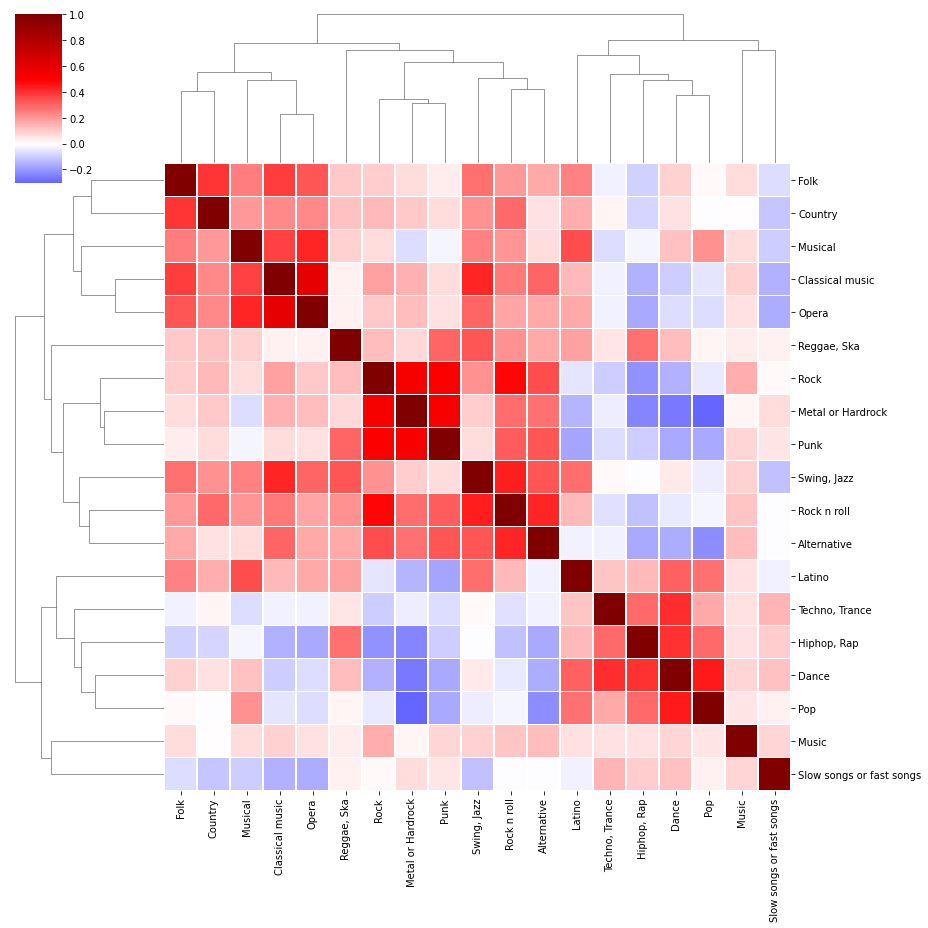

In [ ]:
#  clustermap plot using Seaborn

snus.clustermap(music_df.corr(), center=0, cmap="seismic",
                             linewidths=.75, figsize=(13, 13))

In cluster analysis, the elbow method is a heuristic used in determining the number of clusters in a data set. The method consists of plotting the explained variation as a function of the number of clusters, and picking the elbow of the curve as the number of clusters to use.

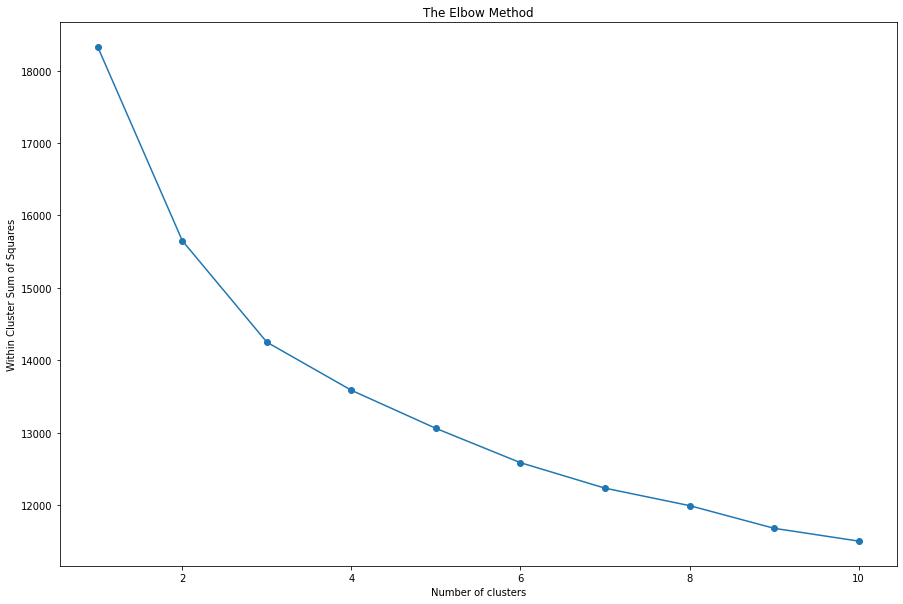

In [ ]:
df=music_df
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i,max_iter=300,n_init=10,random_state=0)
    km=kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(15, 10))
plt.plot(range(1,11), wcss, marker="o")

plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within Cluster Sum of Squares')

plt.show()

based on the presented graph, we can say that the optimal number of clusters is **2 or 3**. Let us verify this by applying of **silhouette metric**.

In [ ]:
max_score = 0
max_score_ind = 0
for i in range(2,13):
    labels = cluster.KMeans(n_clusters=i, init="k-means++", random_state=200).fit(df).labels_
    score = metrics.silhouette_score(df,labels,metric="euclidean",sample_size=1000,random_state=200)
    print(f'Silhouette score for k(clusters) = {str(i)} is {str(score)}')
    if score > max_score:
      max_score = score
      max_score_ind = i

print(f'Max silvuple score equals {max_score} for cluster={max_score_ind}')

Silhouette score for k(clusters) = 2 is 0.13520522137009722
Silhouette score for k(clusters) = 3 is 0.11786172547915434
Silhouette score for k(clusters) = 4 is 0.08980484104641986
Silhouette score for k(clusters) = 5 is 0.08179523201790853
Silhouette score for k(clusters) = 6 is 0.08559940141442046
Silhouette score for k(clusters) = 7 is 0.07996444020573532
Silhouette score for k(clusters) = 8 is 0.07757501883121092
Silhouette score for k(clusters) = 9 is 0.07549234138524728
Silhouette score for k(clusters) = 10 is 0.07463276469542536
Silhouette score for k(clusters) = 11 is 0.07733669937921914
Silhouette score for k(clusters) = 12 is 0.07254778601148644
Max silvuple score equals 0.13520522137009722 for cluster=2


As the metric shows, the optimal number of clusters is **2**.

Train the model **K-means** based on the received information about the number of clusters:

In [ ]:
kmeans = cluster.KMeans(n_clusters=2 ,init="k-means++")

In [ ]:
kmeans = kmeans.fit(music_df)

In [ ]:
df['Clusters'] = kmeans.labels_

We write down the relation to any particular group in the column ***'Clusters'***

In [ ]:
df.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera,Clusters
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,1
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,4.0,1.0,3.0,1.0,4.0,4.0,2.0,1.0,1.0,0
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,4.0,1.0,4.0,3.0,5.0,5.0,5.0,1.0,3.0,0
3,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,2.0,5.0,3.0,2.0,1.0,2.0,4.0,2.0,2.0,1
4,5.0,3.0,2.0,3.0,2.0,3.0,3.0,2.0,5.0,5.0,3.0,4.0,3.0,4.0,4.0,5.0,3.0,1.0,3.0,0


## **Musical Interest Groups**

Let us show clearly which specific groups according to musical interests or preferences our trained model has identified. 

Let's build graphs in which we will group the data for each selected group and average the grades that students gave for each genre. 

Thus, we will get statistics indicating which genres are popular and which are not in this particular group.

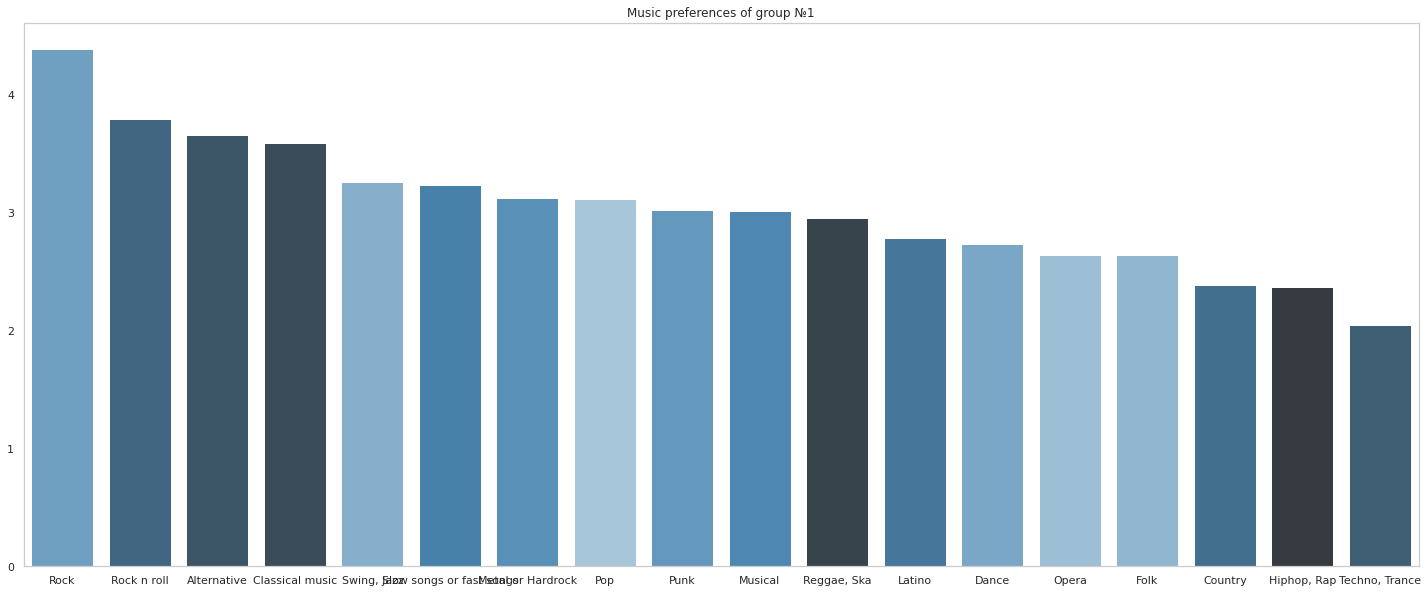

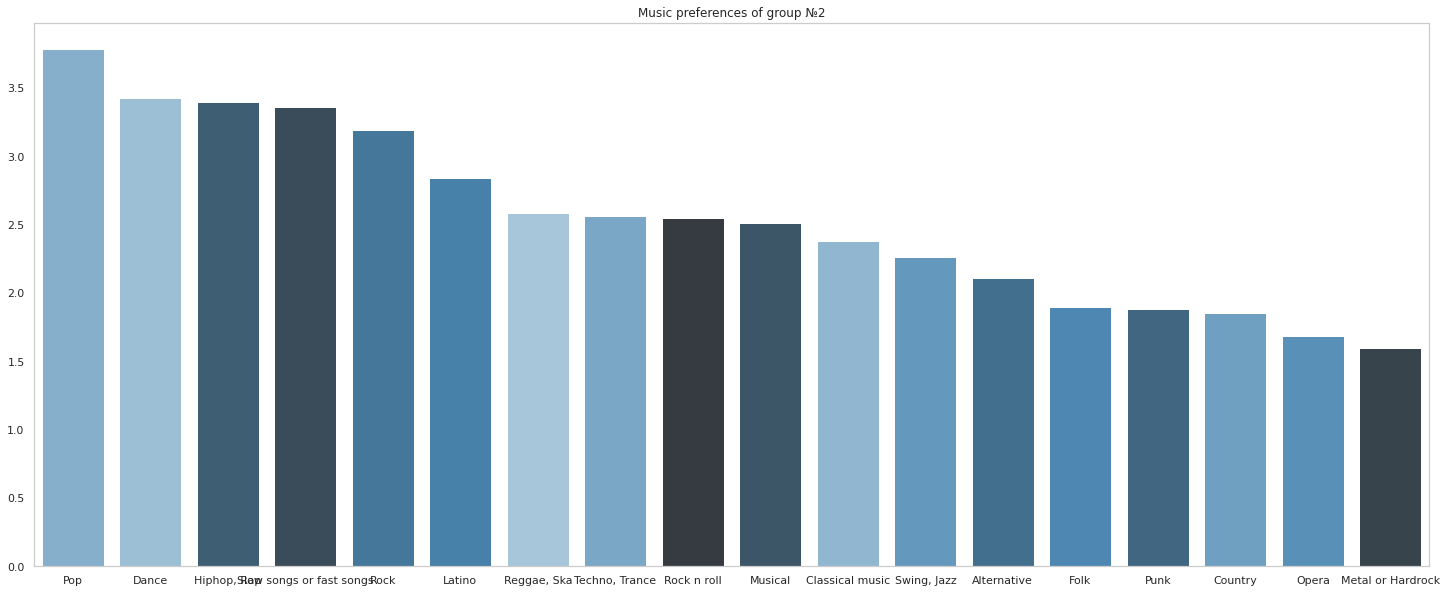

In [ ]:
groups = df.groupby(['Clusters']).mean()
groups.drop('Music', axis=1, inplace=True)

snus.set(style="whitegrid", color_codes=True)

pal = snus.color_palette("Blues_d", len(groups.columns.values))  
for group_num in range(len(groups)):
  plt.figure(figsize=(25, 10))
  plt.grid()
  rank = groups.values[group_num].argsort().argsort()
  sorted_values = sorted(list(enumerate(groups.values[group_num])), key=lambda x: x[1], reverse=True)
  sorted_columns = [groups.columns.values[i[0]] for i in sorted_values]
  sorted_values = [i[1] for i in sorted_values]
  ax = snus.barplot(x=sorted_columns, y=sorted_values,  palette=np.array(pal[::-1])[rank])
  ax.set_title(f'Music preferences of group №{group_num + 1}')
  plt.show()

We found two groups: 
 

*   who love music in a more complex and difficult way for perception (**group #1**). These people like Rock, Rock n Roll, Classical Music, Alternative, Metal and Hardrock some of them.
*   who listen to what is being played everywhere now (**group #2**). These students like Pop, Dance, Hiphop, Slow songs.




## **Top-5 of music**

Let's take a look at the genres that students enjoy the most:

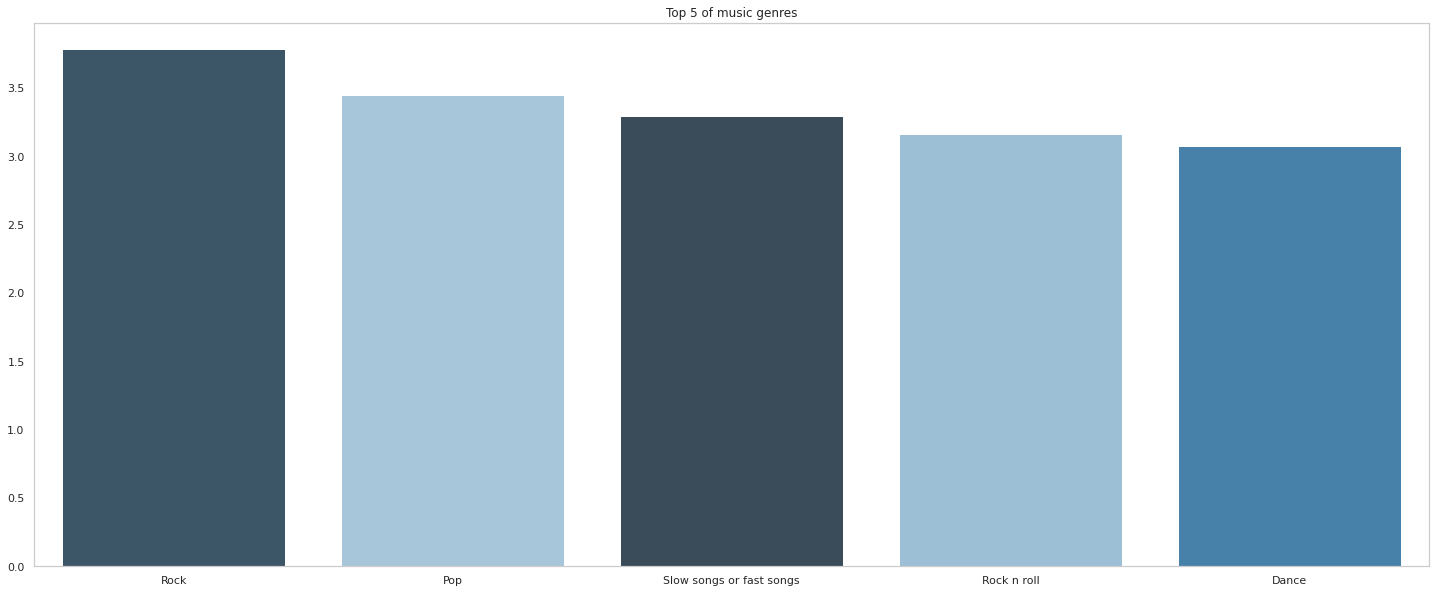

In [ ]:
df_music_genres = df.drop(['Music', 'Clusters'], axis=1)
df_music_genres.mean()
plt.figure(figsize=(25, 10))
plt.grid()
genres_pal = snus.color_palette("Blues_d", len(df_music_genres.mean().values))  
genres_rank = df_music_genres.mean().values.argsort()
sorted_genres_val = sorted(list(enumerate(df_music_genres.mean().values)), key=lambda x: x[1], reverse=True)
sorted_genres_cols = [df_music_genres.columns.values[i[0]] for i in sorted_genres_val]
sorted_genres_val = [i[1] for i in sorted_genres_val]
ax = snus.barplot(x=sorted_genres_cols[:5], y=sorted_genres_val[:5],  palette=np.array(genres_pal[::-1])[genres_rank])
ax.set_title(f'Top 5 of music genres')
plt.show()

Interestingly, the most popular genre among young people is rock, pop music lasts longer, which is quite obvious, rock and roll and dance music.

## **The influence of musical preferences on films**

In [ ]:
clusters_music = df['Clusters']
music2movies = pd.concat([clusters_music, movies_df],axis=1)
music2movies
# movies_df.dropna()

,Clusters,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action
0,1,5.0,4.0,2.0,5.0,4.0,4.0,1.0,5.0,5.0,3.0,1.0,2.0
1,0,5.0,2.0,2.0,4.0,3.0,4.0,1.0,3.0,5.0,4.0,1.0,4.0
2,0,5.0,3.0,4.0,4.0,2.0,4.0,2.0,5.0,5.0,2.0,2.0,1.0
3,1,5.0,4.0,4.0,5.0,2.0,3.0,3.0,4.0,4.0,3.0,1.0,4.0
4,0,5.0,5.0,5.0,5.0,2.0,3.0,3.0,4.0,3.0,3.0,2.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
669,1,5.0,4.0,4.0,5.0,3.0,4.0,4.0,4.0,5.0,3.0,3.0,3.0
670,0,5.0,2.0,3.0,4.0,5.0,4.0,2.0,5.0,5.0,2.0,1.0,4.0
671,1,4.0,5.0,5.0,3.0,5.0,2.0,1.0,4.0,4.0,3.0,1.0,3.0
672,1,5.0,3.0,4.0,5.0,3.0,1.0,2.0,5.0,5.0,3.0,1.0,4.0


Let's take a look at what preferences the group has in films, which loves music "**harder**" and "**ligher**"

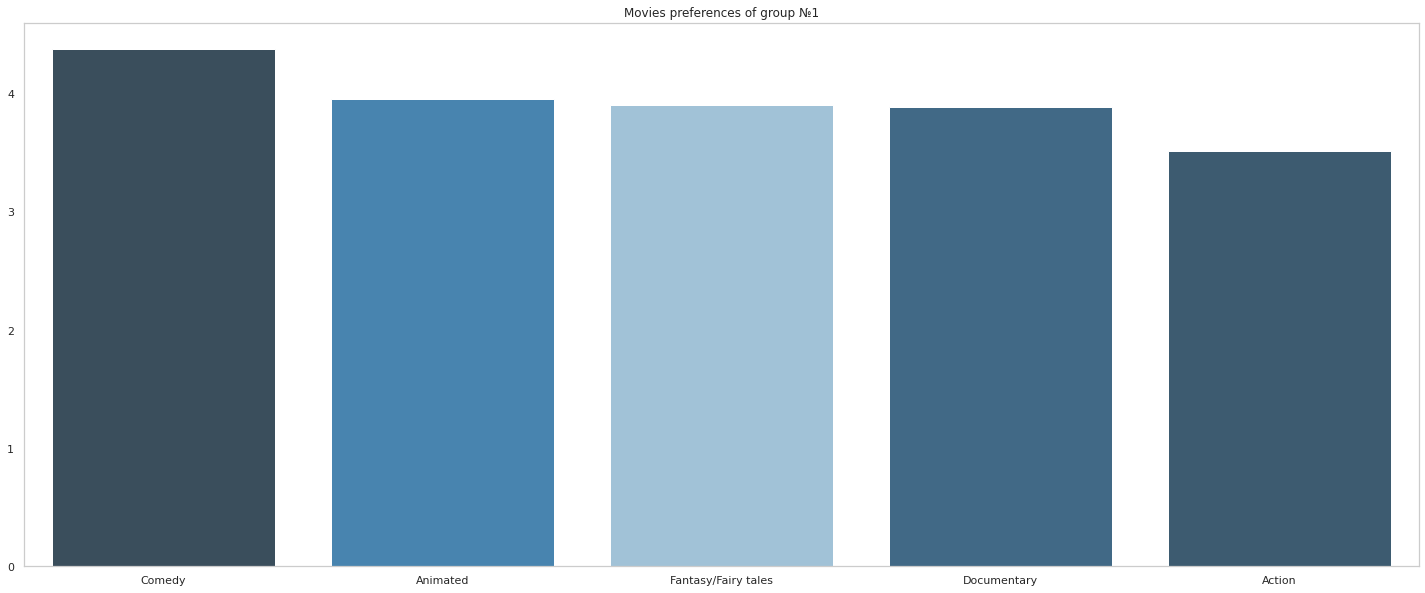

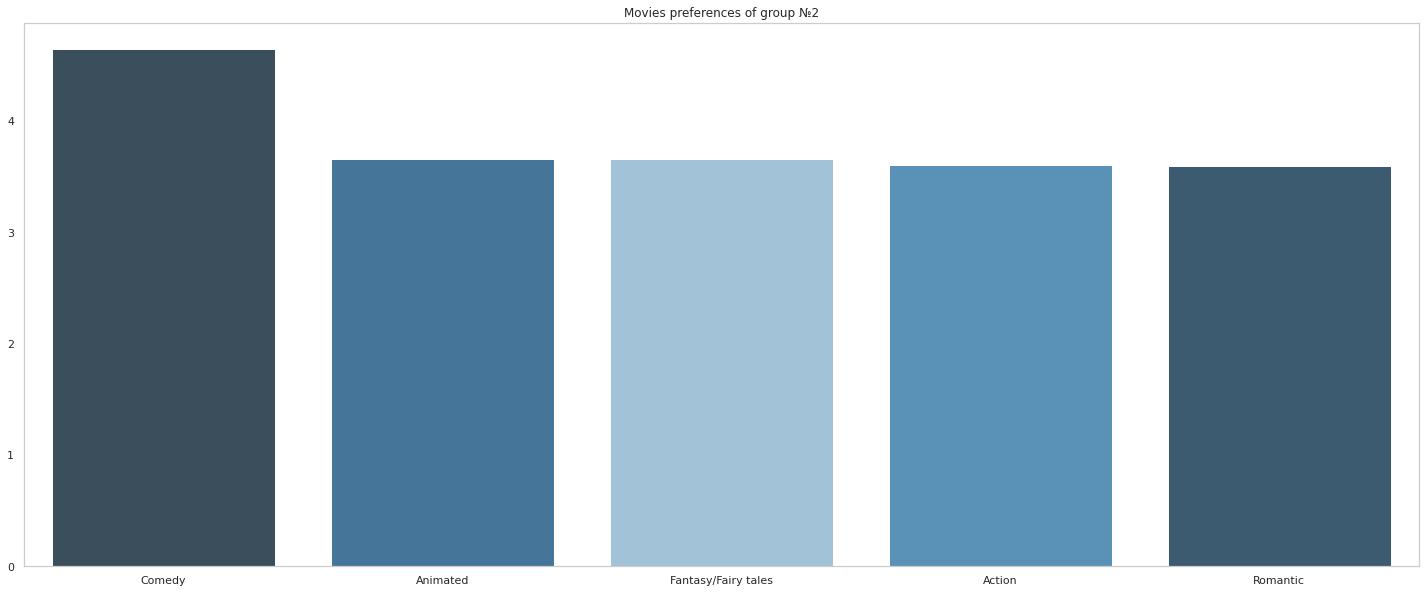

In [ ]:
groups = music2movies.groupby(['Clusters']).mean()
groups.drop('Movies', axis=1, inplace=True)

snus.set(style="whitegrid", color_codes=True)

pal = snus.color_palette("Blues_d", len(groups.columns.values))  
for group_num in range(len(groups)):
  plt.figure(figsize=(25, 10))
  plt.grid()
  rank = groups.values[group_num].argsort().argsort()
  sorted_values = sorted(list(enumerate(groups.values[group_num])), key=lambda x: x[1], reverse=True)
  sorted_columns = [groups.columns.values[i[0]] for i in sorted_values]
  sorted_values = [i[1] for i in sorted_values]
  ax = snus.barplot(x=sorted_columns[:5], y=sorted_values[:5],  palette=np.array(pal[::-1])[rank])
  ax.set_title(f'Movies preferences of group №{group_num + 1}')
  plt.show()

What is surprising and not at all expected is that the preferences in films for each of the groups are practically **the same**. The only difference is the love for **documentary** films in the **first** group, and love for **romantic** films in the second group.

# **Task 2**

## Person 1

One of us chose such categories in music and films: **dance** and **thrillers**. Well, let's see what results we get statistically.

Functions for drawing graphs:

In [ ]:
def draw_plots_for_person_preferences(music_condition, movies_condition):
  person_df = data.loc[music_condition].loc[movies_condition]
  music_df = person_df.loc[:,'Slow songs or fast songs':'Opera']
  draw_preferences_ranged_plot(music_df, 'Person music preferences')
  movies_df = person_df.loc[:,'Horror':'Action']
  draw_preferences_ranged_plot(movies_df, 'Person movies preferences', color_palette='Blues_d')

  personality_df = person_df.loc[:,column_info['short'].values[76]:column_info['short'].values[76+57-1]]
  draw_preferences_ranged_plot(personality_df, 'Top-10 of their personality characteristics', 10, 'Oranges_d')

In [ ]:
def draw_preferences_ranged_plot(df, title, max_val_amount=None,color_palette='Greens_d'):
  plt.ioff
  plt.figure(figsize=(20, 10))
  plt.grid()
  pal = snus.color_palette(color_palette, len(df.mean().values))  
  rank = df.mean().values.argsort()
  sorted_vals = sorted(list(enumerate(df.mean().values)), key=lambda x: x[1], reverse=True)
  sorted_cols = [df.columns.values[i[0]] for i in sorted_vals]
  sorted_vals = [i[1] for i in sorted_vals]
  ax = snus.barplot(x=sorted_cols[:max_val_amount], y=sorted_vals[:max_val_amount],  palette=np.array(pal[::-1])[rank])
  ax.set_title(title)
  plt.show()

Below we will look at three graphs, namely:


*   the first shows us about the distribution of **musical preferences** among those who like to listen to dance music.
*   the second shows the distribution of **movie preferences** among people who love thrillers.
*   and the third shows the **top 10 personal characteristics** of a person who belongs to such a group of fans of dance music and thrillers.

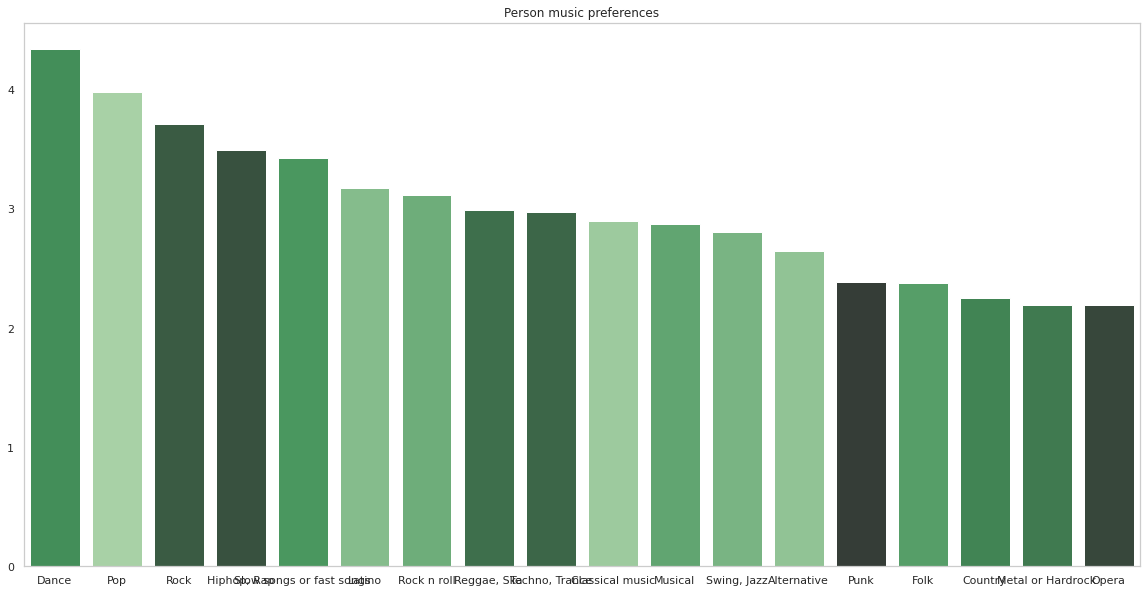

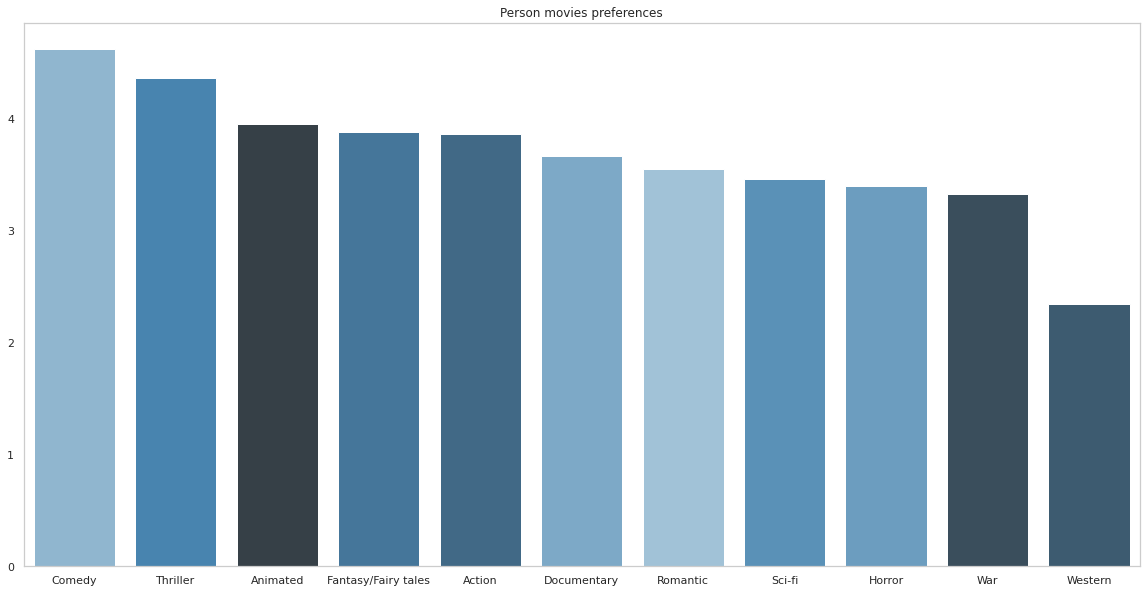

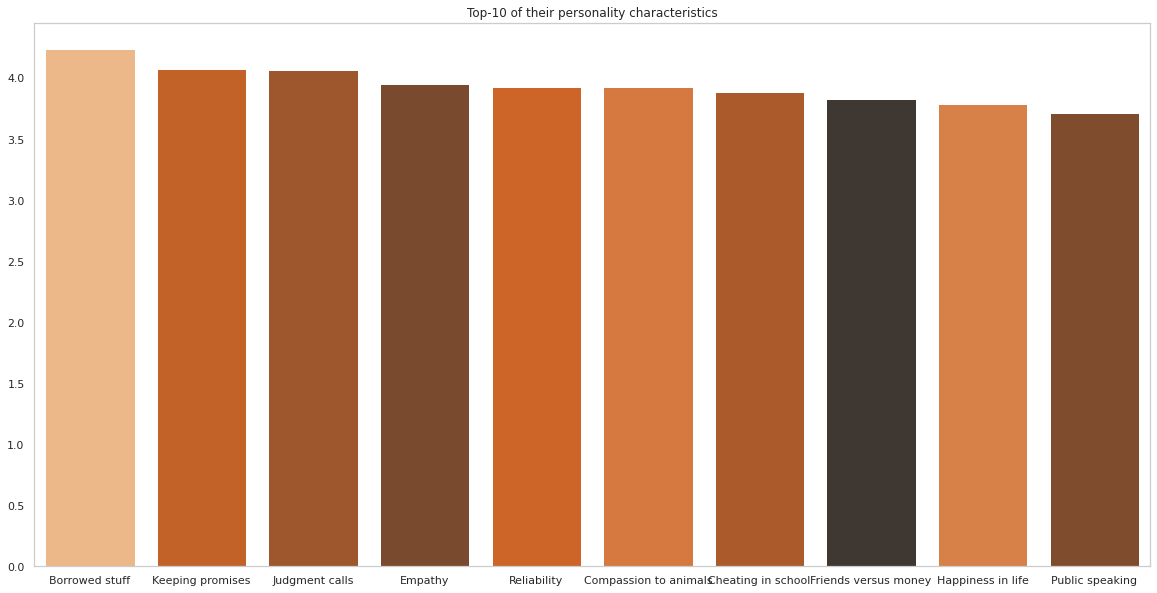

In [ ]:
draw_plots_for_person_preferences(data['Dance'] > 3, data['Thriller'] > 3)

**Music preferences:**


1.   Interestingly, dance music lovers also love rock, hip-hop music, and pop.
2.   However, they also do not like opera, hard rock.



**Movie preferences**:


1.   This group of people with such tastes likes comedy, animated and 
2.   does not like westerns at all.



**Top 10 personal characteristics:**

A lot of interesting facts have been collected here, namely: people with such musical and film preferences like to take clothes to abuse, like to make judgmental calls, cheat at school. However, they also know how to keep secrets, are empathic, note that they are happy in life and like to talk in public.

## Person 2

One of us chose such categories in music and films: **Punk** and **Documentary**. Well, let's see what results we get statistically.

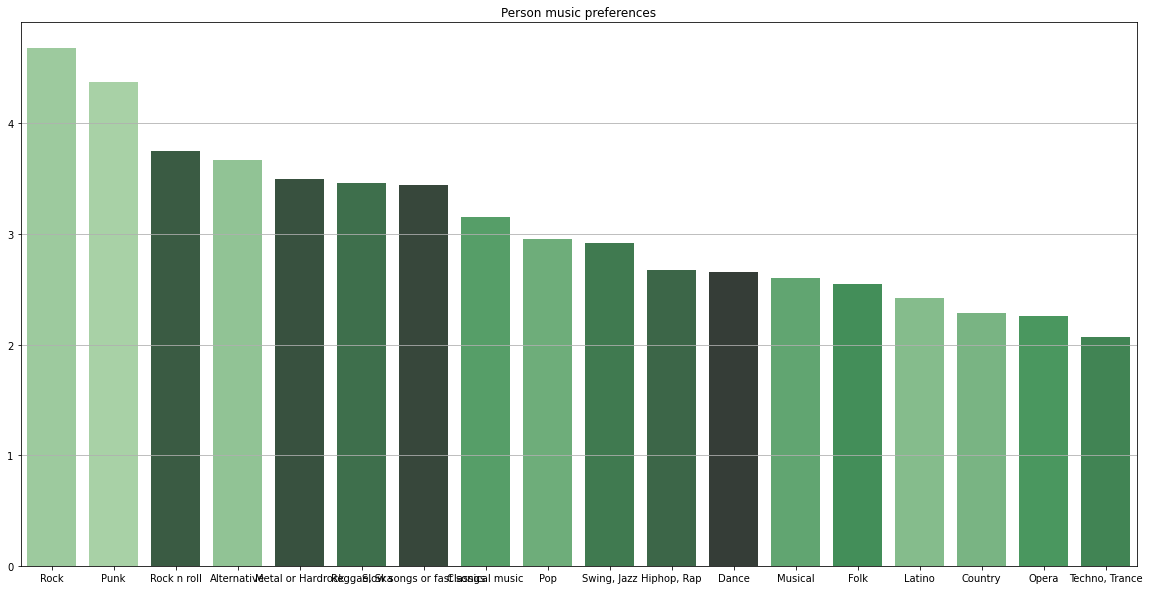

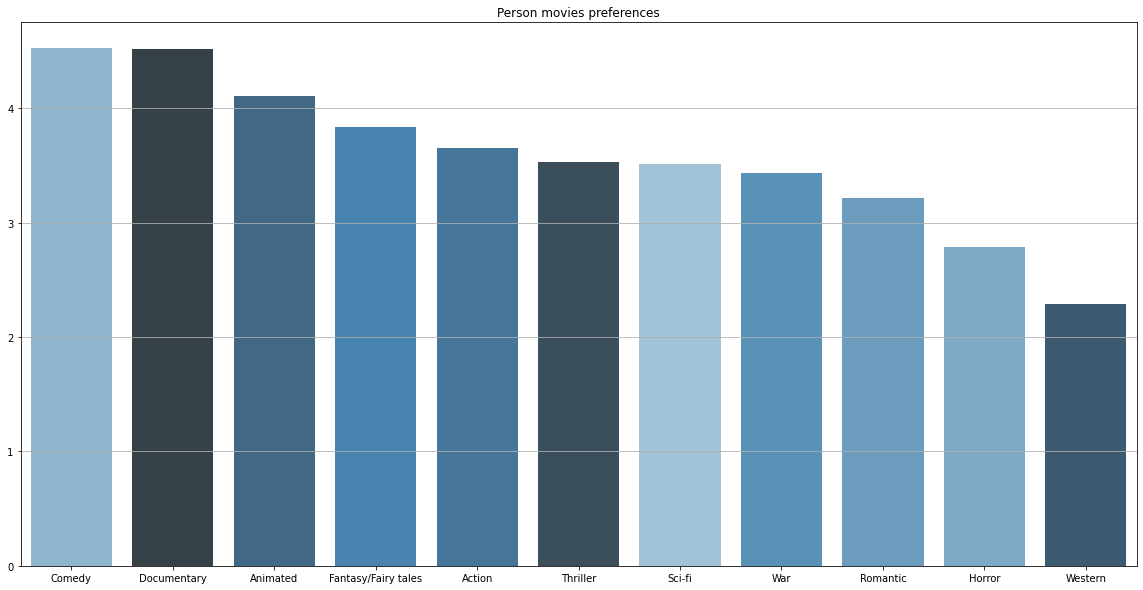

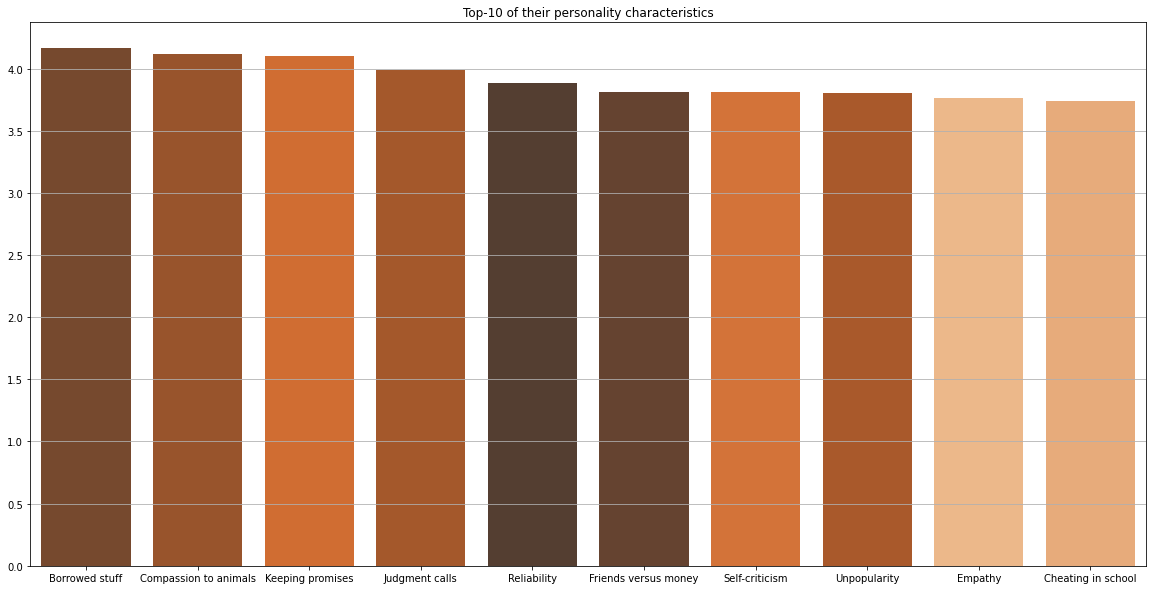

In [ ]:
draw_plots_for_person_preferences(data['Punk'] > 3, data['Documentary'] > 3)

**Music preferences:**


1.   Interestingly, dance music lovers also love rock, rock-n-roll music, alternative and metal.
2.   However, they also do not like opera,techno.



**Movie preferences**:


1.   This group of people with such tastes likes comedy, animated and 
2.   does not like westerns at all.


**Top 10 personal characteristics:**


In general, the people of this group are very similar in terms of the set of characteristics to the group that existed before. The only exceptions are that instead of feeling happy in their lives, they like to criticize themselves. They are not popular in school. It can be assumed that they are more introverted than extroverted (like the previous ones). 

# Task 3

### K-means

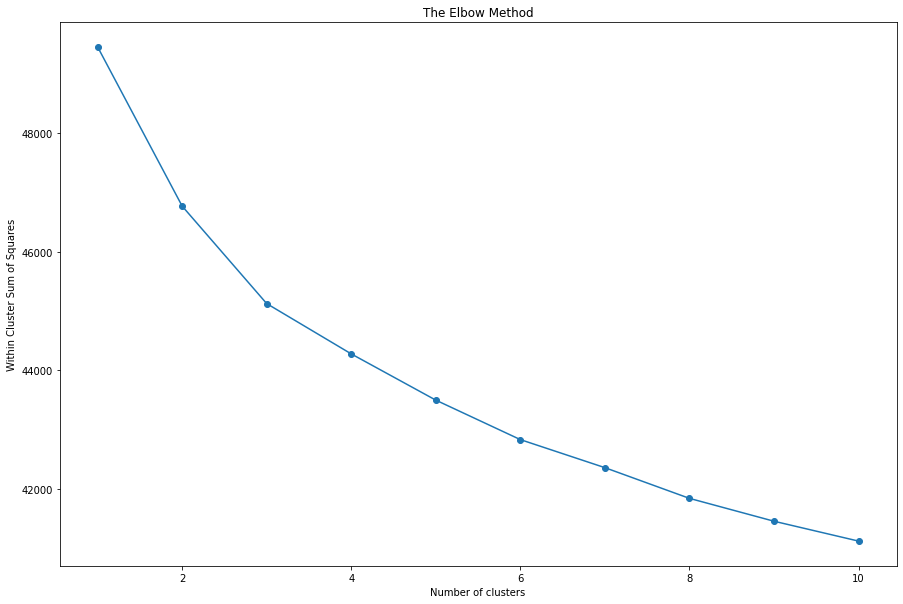

In [ ]:
df = personality_df
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i,max_iter=300,n_init=10,random_state=0)
    km=kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(15, 10))
plt.plot(range(1,11), wcss, marker="o")

plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within Cluster Sum of Squares')

plt.show()

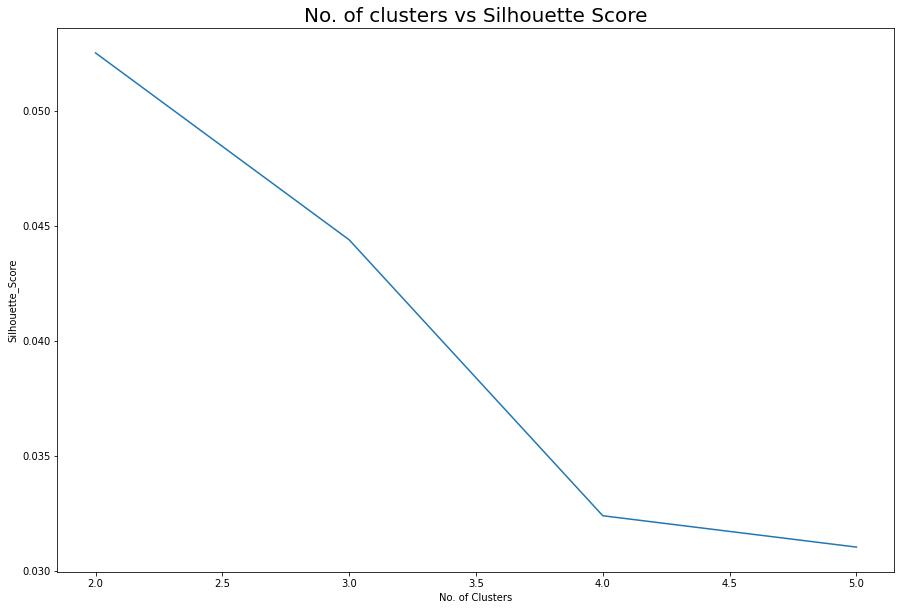

In [ ]:
scaler=StandardScaler()
scaler.fit(df)
wcss = []
#x=scaler.transform(x)
for i in range(2, 6):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 1000, n_init = 10,random_state=0)
    km.fit(df)
    y_means=km.predict(df)
    s=metrics.silhouette_score(df,y_means)
    wcss.append(s)
plt.figure(figsize=(15, 10))
plt.plot(range(2, 6), wcss)
plt.title('No. of clusters vs Silhouette Score', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('Silhouette_Score')
plt.show()

optimal number of clusters is 2.

### DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
range_min = [x for x in range(2, 51, 1)]
range_eps = [x for x in range(1, 51, 1)]
# [y / 10.0 for y in range(1, 51, 1)] + <br />
# [round(z, 2) for z in np.arange(1.10, 1.31, 0.01)]
dic = {}
for m in range_min:

    for e in range_eps:

        model_1 = DBSCAN(eps = e, min_samples = m).fit(df)

        core_samples_mask = np.zeros_like(model_1.labels_, dtype = bool)

        core_samples_mask[model_1.core_sample_indices_] = True

        labels = model_1.labels_

        if len( set(labels) ) > 1:

            silhouette_Avg = silhouette_score(df, labels)

            if silhouette_Avg > 0:

                dic[str(m) + " - " + str(e)] = silhouette_Avg

                print("min-sample value is: " + str(m) + " eps value is: " + str(e) , "The average silhouette_score is :",                               silhouette_Avg)
 
max_key = max(dic, key = dic.get)
print("parameter values are: ", max_key)
print("maximum silhouette score value is: ", dic[max_key])

min-sample value is: 2 eps value is: 9 The avearge silhouette_score is : 0.03084860278026896
min-sample value is: 2 eps value is: 10 The avearge silhouette_score is : 0.1547237817209649
min-sample value is: 2 eps value is: 11 The avearge silhouette_score is : 0.17126131524229368
min-sample value is: 2 eps value is: 12 The avearge silhouette_score is : 0.25726020564962104
min-sample value is: 3 eps value is: 9 The avearge silhouette_score is : 0.10453165670085865
min-sample value is: 3 eps value is: 10 The avearge silhouette_score is : 0.16999401596550667
min-sample value is: 3 eps value is: 11 The avearge silhouette_score is : 0.206343760302493
min-sample value is: 3 eps value is: 12 The avearge silhouette_score is : 0.25726020564962104
min-sample value is: 4 eps value is: 8 The avearge silhouette_score is : 0.01177713328194372
min-sample value is: 4 eps value is: 9 The avearge silhouette_score is : 0.1016561540951303
min-sample value is: 4 eps value is: 10 The avearge silhouette_score

### AgglomerativeClustering

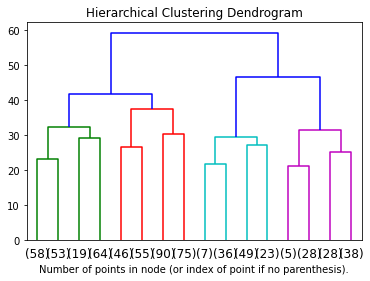

In [ ]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(df)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

### Comparison of models

In [ ]:
algorithms = []
algorithms.append(KMeans(n_clusters=2, random_state=1))
algorithms.append(DBSCAN(min_samples=2, eps=12))
algorithms.append(AgglomerativeClustering(n_clusters=2))

data = []
for algo in algorithms:
    algo.fit(df)
    data.append(({
        'Calinski and Harabasz score': metrics.calinski_harabasz_score(df, algo.labels_),
        'Davies-Bouldin Index': metrics.davies_bouldin_score(df, algo.labels_),
        'Silhouette': metrics.silhouette_score(df, algo.labels_)}))

results = pd.DataFrame(data=data, columns=['Calinski and Harabasz score',
                                           'Davies-Bouldin Index', 
                                           'Silhouette'],
                       index=['K-means', 'DBSCAN', 'AgglomerativeClustering' ])

results

,Calinski and Harabasz score,Davies-Bouldin Index,Silhouette
K-means,38.515415,4.106137,0.053151
DBSCAN,2.596320,0.610597,0.257260
AgglomerativeClustering,24.763386,4.843801,0.050963


K-means the best

### PCA

Try the PCA to improve our models

In [ ]:
pca = PCA(n_components = 3).fit_transform(personality_df)

In [ ]:
pca.shape

(674, 3)

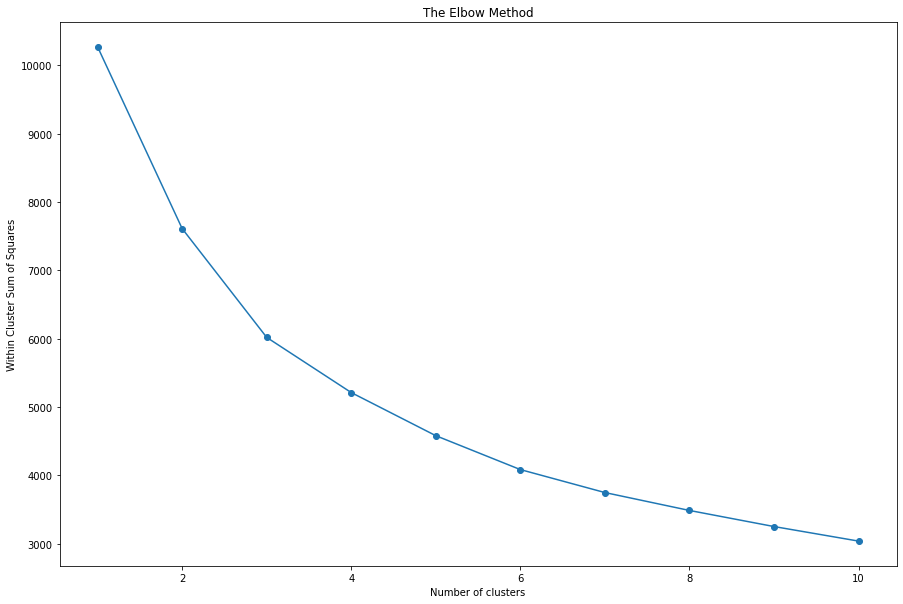

In [ ]:
df = pca
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i,max_iter=300,n_init=10,random_state=0)
    km=kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(15, 10))
plt.plot(range(1,11), wcss, marker="o")

plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within Cluster Sum of Squares')

plt.show()

What we get:

In [ ]:
data_1 = {
        'Calinski and Harabasz score': metrics.calinski_harabasz_score(pca, KMeans(n_clusters=2,max_iter=300,n_init=10,random_state=0).fit(df).labels_),
        'Davies-Bouldin Index': metrics.davies_bouldin_score(pca, KMeans(n_clusters=2,max_iter=300,n_init=10,random_state=0).fit(df).labels_),
        'Silhouette': metrics.silhouette_score(pca, KMeans(n_clusters=2,max_iter=300,n_init=10,random_state=0).fit(df).labels_)}

In [ ]:
df_2 = pd.DataFrame(data =data_1, columns = ['Calinski and Harabasz score',
                                           'Davies-Bouldin Index', 
                                           'Silhouette'], index=['PCA K-means'])

In [ ]:
pd.concat([results, df_2], axis=0)

,Calinski and Harabasz score,Davies-Bouldin Index,Silhouette
K-means,38.515415,4.106137,0.053151
DBSCAN,2.596320,0.610597,0.257260
AgglomerativeClustering,24.763386,4.843801,0.050963
PCA K-means,234.696367,1.520111,0.245440


PCA K-means are best

### Interpretation

In [ ]:
personality_df['Clusters'] = KMeans(n_clusters=2,max_iter=300,n_init=10,random_state=0).fit(df).labels_

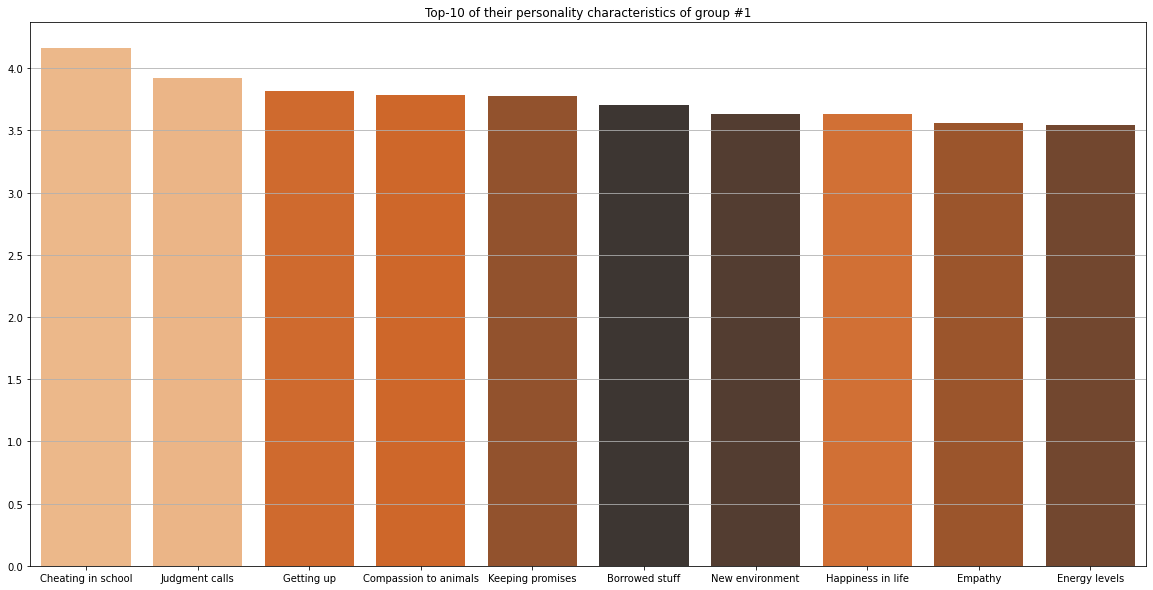

In [ ]:
draw_preferences_ranged_plot(personality_df[personality_df['Clusters'] == 0], 'Top-10 of their personality characteristics of group #1', 10, 'Oranges_d')

We can see that this group of people is different in that they are energetic, always and everywhere, they cheat at school, they are emotional, but they note that they are happy. We can say that they are more likely to be extroverts.

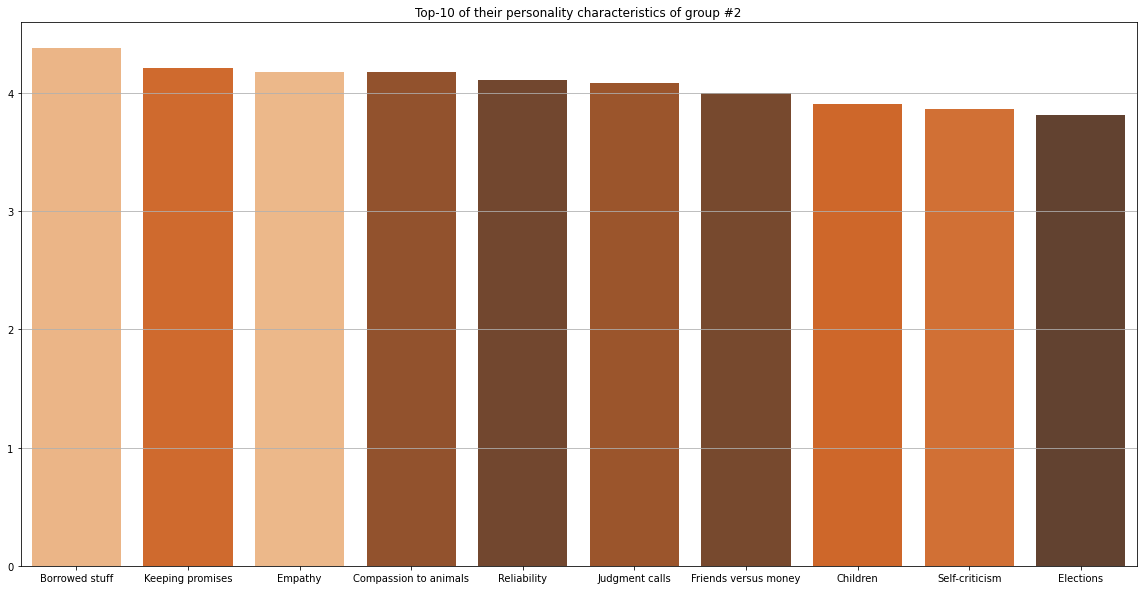

In [ ]:
draw_preferences_ranged_plot(personality_df[personality_df['Clusters'] == 1], 'Top-10 of their personality characteristics of group #2', 10, 'Oranges_d')

Another group of people is more pathetic, less emotional, more withdrawn. They are distinguished by a great love of self-criticism. They are more introverts that you can trust well, because they keep their promises and they like to show empathy. They love children.

# dopolnitel'no

## Demographic

### Male/Female music preferences

In [ ]:
demograph_df = demographics_df
female_df = demograph_df.loc[demograph_df['Gender'] == 'female']
female_df = data.loc[female_df.index.values]
female_music_df = female_df.loc[:,'Music':column_info['short'].values[19 - 1]].drop(['Music'], axis=1)

male_df = demograph_df.loc[demograph_df['Gender'] == 'male']
male_df = data.loc[male_df.index.values]
male_music_df = male_df.loc[:,'Music':column_info['short'].values[19 - 1]].drop(['Music'], axis=1)

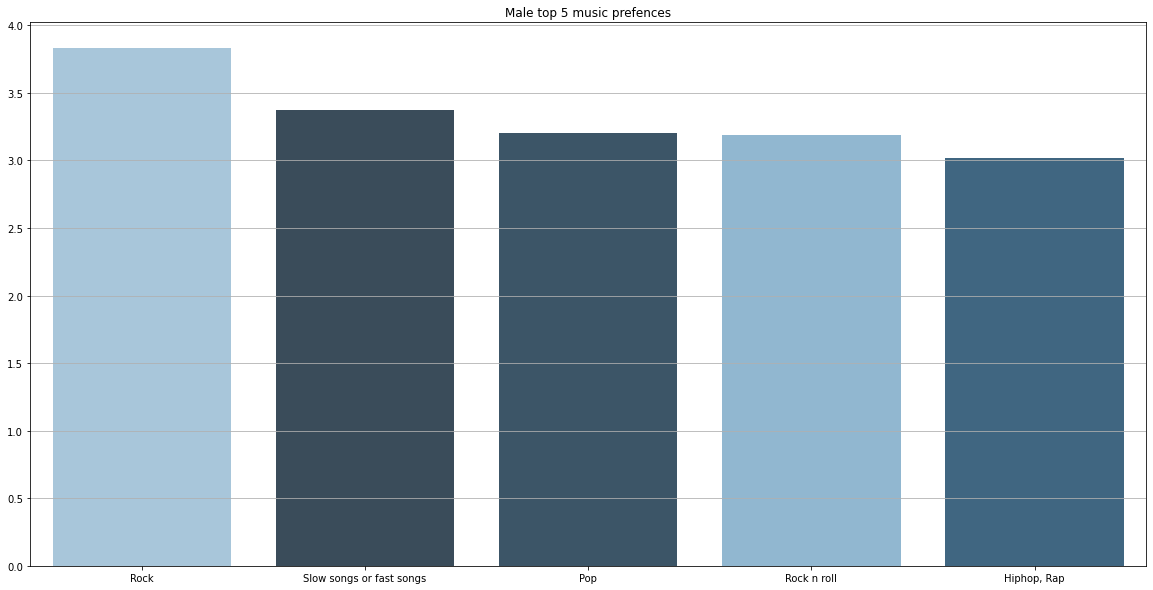

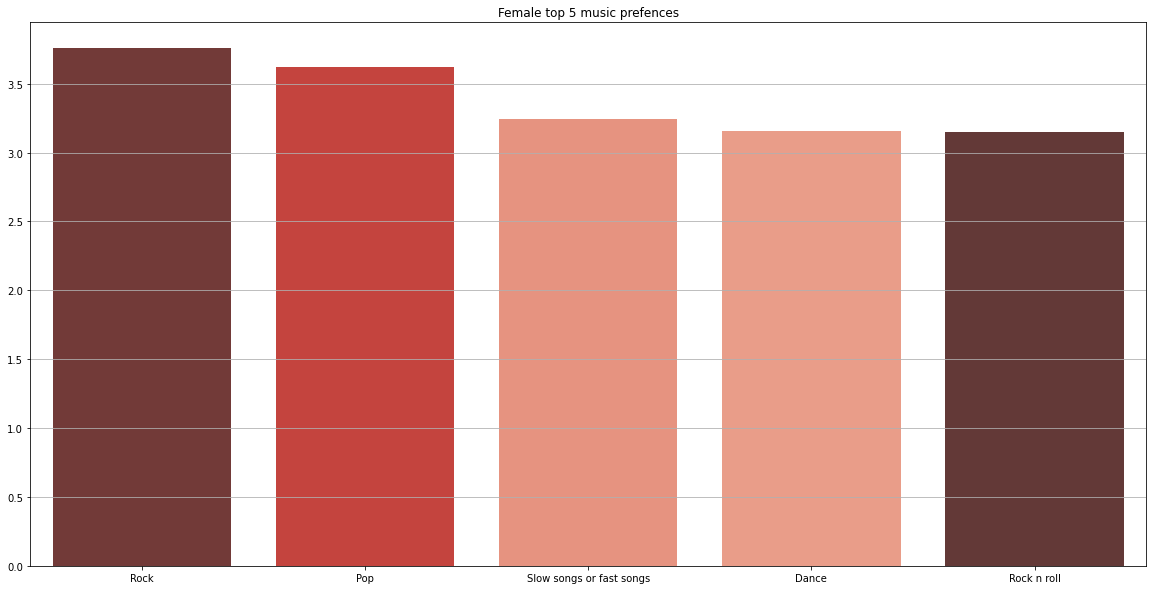

In [ ]:
draw_preferences_ranged_plot(male_music_df, 'Male top 5 music prefences', max_val_amount=5, color_palette='Blues_d')
draw_preferences_ranged_plot(female_music_df, 'Female top 5 music prefences', max_val_amount=5, color_palette='Reds_d')

It is quite exciting, the dominant musical genres for **male** and **female** are practically the same.

### Movies preferences by age

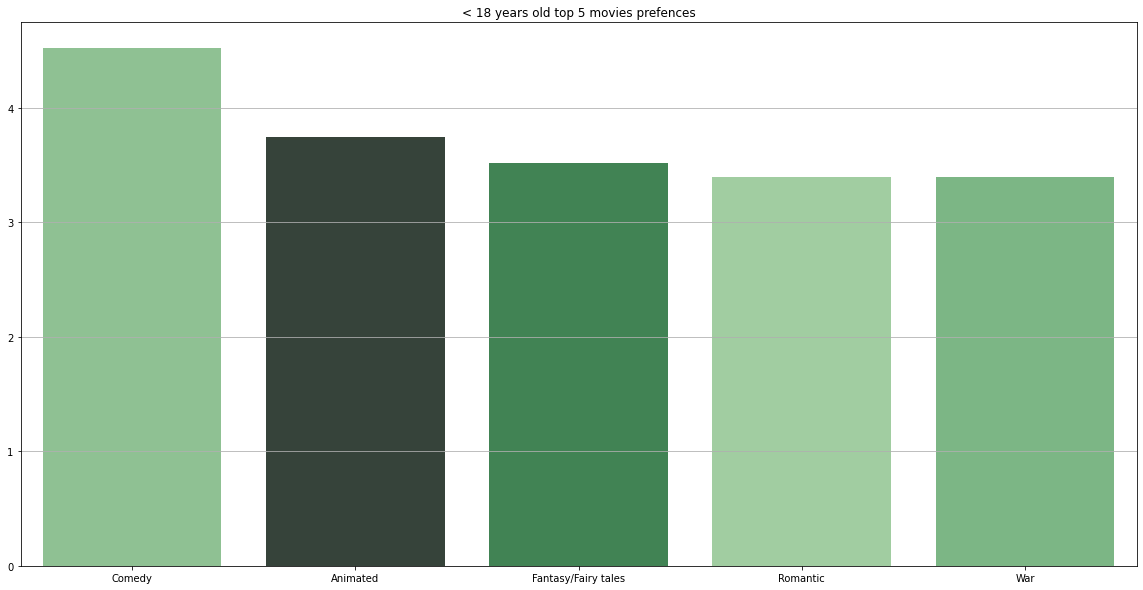

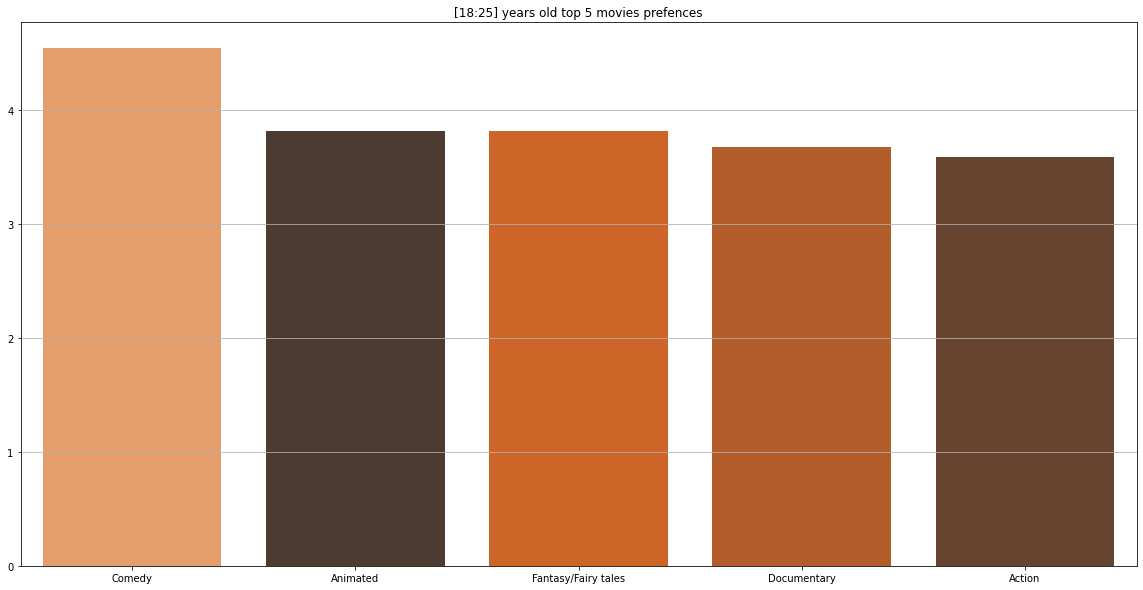

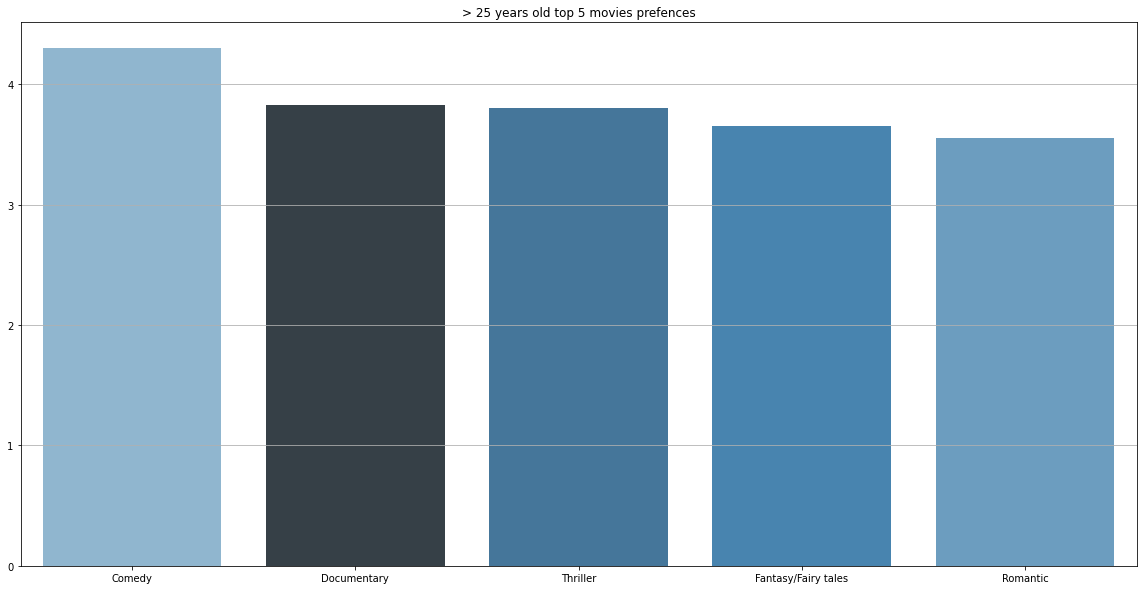

In [ ]:
demograph_df = demographics_df
kid_df = demograph_df.loc[demograph_df['Age'] < 18]
kid_df = data.loc[kid_df.index.values]
kid_movies_df = kid_df.loc[:,'Horror':'Action']

mid_df = demograph_df.loc[demograph_df['Age'] > 18].loc[demograph_df['Age'] < 25]
mid_df = data.loc[mid_df.index.values]
mid_movies_df = mid_df.loc[:,'Horror':'Action']


old_df = demograph_df.loc[demograph_df['Age'] > 25]
old_df = data.loc[old_df.index.values]
old_movies_df = old_df.loc[:,'Horror':'Action']



draw_preferences_ranged_plot(kid_movies_df, '< 18 years old top 5 movies prefences', max_val_amount=5)
draw_preferences_ranged_plot(mid_movies_df, '[18:25] years old top 5 movies prefences', max_val_amount=5, color_palette='Oranges_d')
draw_preferences_ranged_plot(old_movies_df, '> 25 years old top 5 movies prefences', max_val_amount=5, color_palette='Blues_d')

Most people love comedy, but then there are some differences:


*   **People under 18** prefer light films, namely Animated, romantic films and fantasy
*   **people from 18 to 25** prefer documentary and action films instead of romantic films
*   **older people** prefer documentaries, thrillers



### How spent money clever and not guys

In [ ]:
demograph_df['Education'].unique()

array(['college/bachelor degree', 'secondary school', 'primary school',
       'masters degree', 'doctorate degree',
       'currently a primary school pupil'], dtype=object)

In [ ]:
column_info['short'].values[133],column_info['short'].values[133+7-1]

('Finances', 'Spending on healthy eating')

In [ ]:
not_assignee_df = demograph_df.loc[demograph_df['Education'].isin(['secondary school', 'primary school'])].loc[demograph_df['Age'] > 18]
not_assignee_df = data.loc[not_assignee_df.index.values]
not_assignee_money_habits_df = not_assignee_df.loc[:,'Finances':'Spending on healthy eating']
not_assignee_money_habits_df

assignee_df = demograph_df.loc[demograph_df['Education'].isin(['college/bachelor degree', 'masters degree', 'doctorate degree'])].loc[demograph_df['Age'] > 23]
assignee_df = data.loc[assignee_df.index.values]
assignee_money_habits_df = assignee_df.loc[:,'Finances':'Spending on healthy eating']
assignee_money_habits_df

,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating
12,4.0,1.0,1.0,2.0,3.0,2,3.0
33,2.0,2.0,2.0,1.0,1.0,2,4.0
44,4.0,4.0,3.0,3.0,5.0,3,4.0
67,3.0,3.0,2.0,3.0,2.0,1,3.0
86,2.0,1.0,4.0,2.0,1.0,1,1.0
...,...,...,...,...,...,...,...
959,2.0,1.0,3.0,2.0,3.0,3,3.0
989,3.0,3.0,3.0,3.0,3.0,1,5.0
992,1.0,1.0,1.0,5.0,1.0,1,4.0
998,4.0,2.0,1.0,4.0,3.0,2,5.0


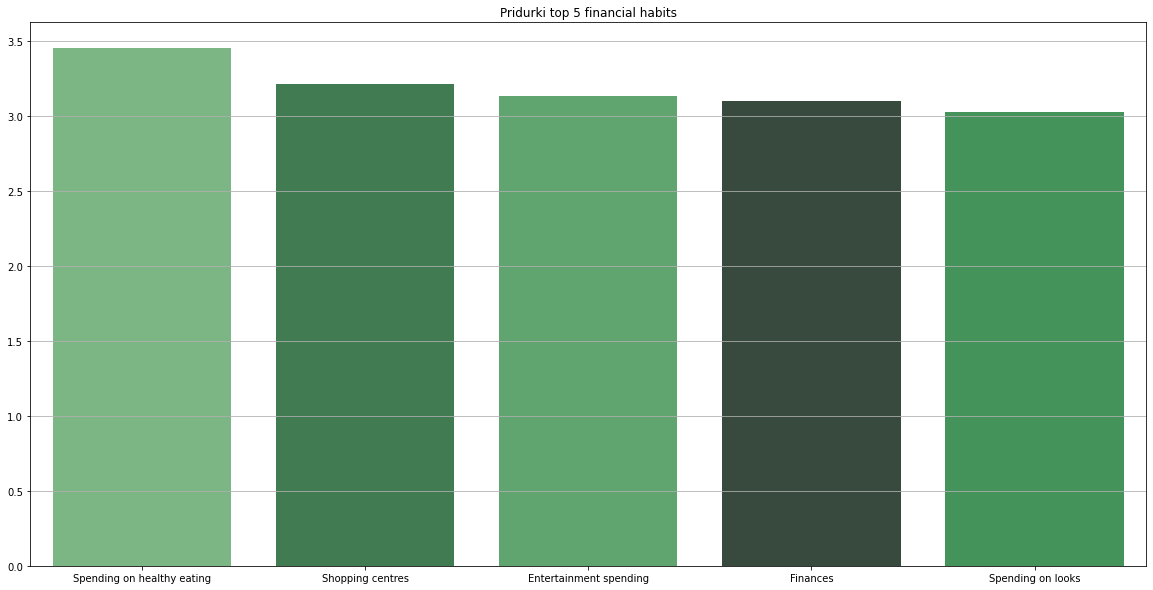

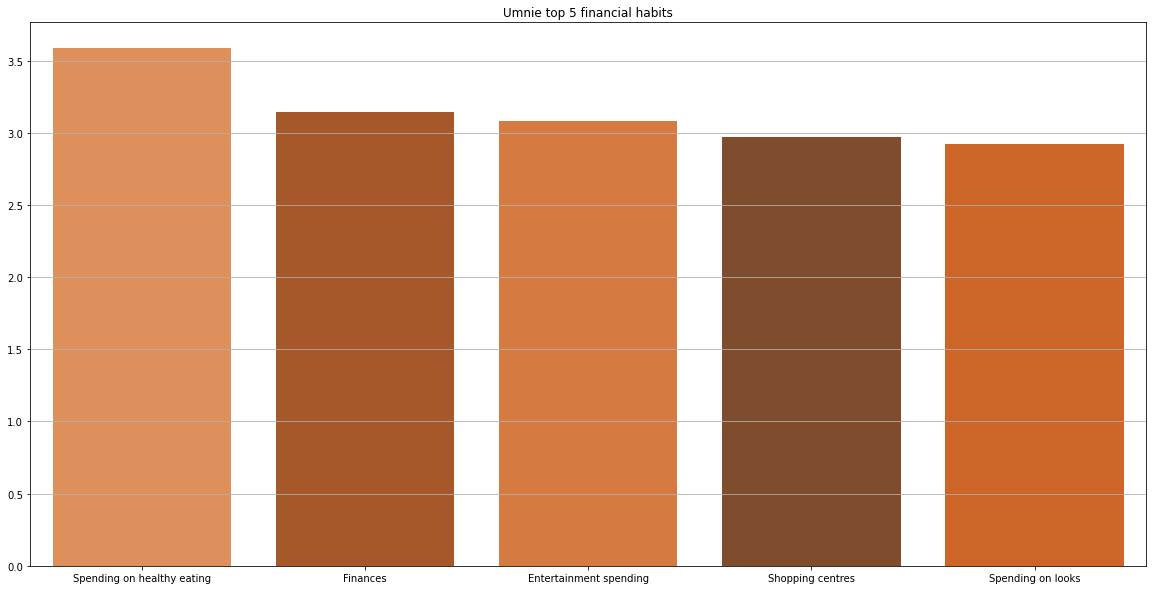

In [ ]:
draw_preferences_ranged_plot(not_assignee_money_habits_df, 'Pridurki top 5 financial habits', max_val_amount=5)
draw_preferences_ranged_plot(assignee_money_habits_df, 'Umnie top 5 financial habits', max_val_amount=5, color_palette='Oranges_d')

In general, they stick into one and the same thing, but the only difference is that the smart ones are in second place - finance, and the stupid ones - shopping malls.